In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

In [6]:
import pygame, pygame.sndarray
pygame.mixer.init(frequency=44100, size=-16, channels=1)

In [17]:
import numpy as np
arr = np.random.randint(-128, 127, size=44100, dtype  = 'int8')
arr

array([-90, -44,  21, ..., -58, 115, -37], dtype=int8)

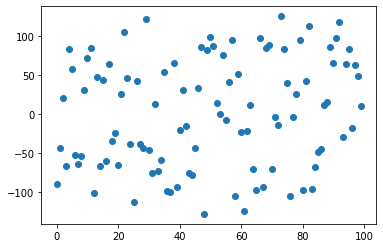

In [18]:
plot_sequence(arr)

In [20]:
sound = pygame.sndarray.make_sound(arr)
sound.play()

In [40]:
arr = np.random.randint(-128, 127, size = 44100, dtype = 'int8')
sound = pygame.sndarray.make_sound(arr)
sound.play()

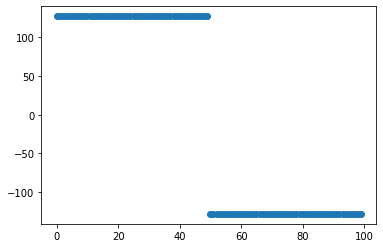

In [41]:
form = np.repeat([127, -128], 50)
plot_sequence(form)

In [49]:
arr = np.tile(form, 441)

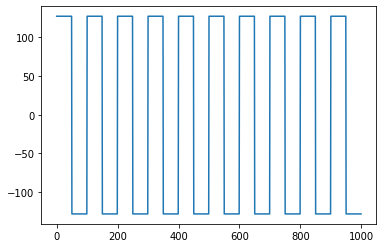

In [50]:
plot_sequence(arr, max = 1000, line = True)

In [53]:
arr = arr.astype('int8')
sound = pygame.sndarray.make_sound(arr)
sound.play()

## Our musical note 'A' was a pattern that repeated 441 times in a second. Create a similar pattern that repeats 350 times in one second, which will produce the musical note  'F'

In [58]:
form = np.repeat([-128, 127], 63)
arr = np.tile(form, 350)
arr = arr.astype('int8')
sound = pygame.sndarray.make_sound(arr)
sound.play()

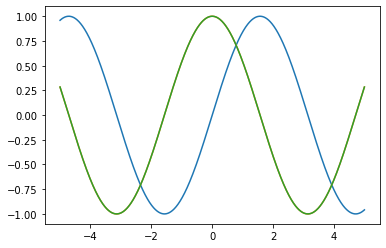

In [68]:
from math import *
plot_function(lambda x : sin(x), -5, 5)
plot_function(lambda x : cos(x), -5, 5)
plot_function(lambda x : sin(x + pi / 2), -5, 5)

In [70]:
def make_sinusoid(frequency,amplitude):
    def f(t): #<1>
        return amplitude * sin(2*pi*frequency*t) #<2>
    return f

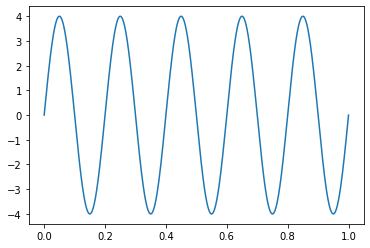

In [71]:
plot_function(make_sinusoid(5, 4), 0, 1)

In [72]:
sinusoid = make_sinusoid(441, 8000)

In [74]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [75]:
np.arange(0, 1, 1/44100)

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99931973e-01, 9.99954649e-01, 9.99977324e-01])

In [81]:
def sample(f,start,end,count): 
    mapf = np.vectorize(f) 
    ts = np.arange(start,end,(end-start)/count) #<3>
    values = mapf(ts) 
    return values.astype(np.int16) 

In [82]:
sinusoid = make_sinusoid(441, 8000)
arr = sample(sinusoid, 0, 1, 44100)
sound = pygame.sndarray.make_sound(arr)
sound.play()

(-10, 10)

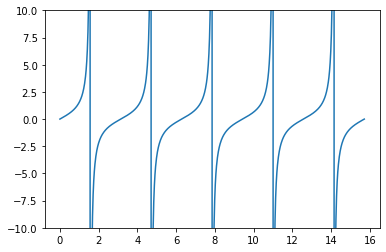

In [88]:
plot_function(lambda x : sin(x) / cos(x), 0, 5 * pi)
plt.ylim(-10, 10)

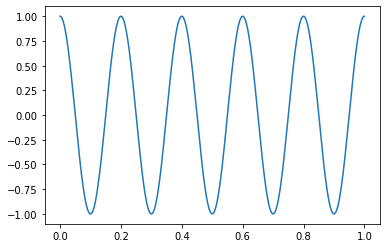

In [93]:
plot_function(lambda t : cos(10 * pi * t), 0, 1)

In [94]:
np.array([1, 2, 3]) + np.array([4, 5, 6])

array([5, 7, 9])

In [95]:
sample1 = sample(make_sinusoid(441,8000),0,1,44100)
sample2 = sample(make_sinusoid(551,8000),0,1,44100)

In [99]:
sample1 = sample1.astype('int16')
sample2 = sample2.astype('int16')

In [102]:
sound1 = pygame.sndarray.make_sound(sample1)
sound2 = pygame.sndarray.make_sound(sample2)
sound1.play()
sound2.play()

In [103]:
chord = pygame.sndarray.make_sound(sample1 + sample2)
chord.play()

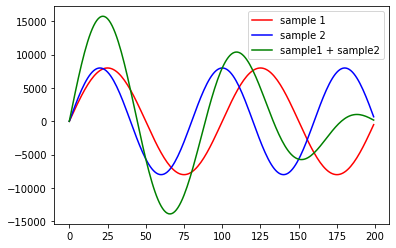

In [116]:
plot_sequence(sample1, max = 200, line = True, color = 'red', label = 'sample 1')
plot_sequence(sample2, max = 200, line = True, color = 'blue', label = 'sample 2')
plot_sequence(sample1 + sample2, max = 200, line = True, color = 'green', label = 'sample1 + sample2')
plt.legend(loc = 'upper right')

In [117]:
def const(n):
    return 1

def fourier_series(a0, a, b):
    def result(t):
        cos_terms = [an * cos(2 * pi * (n + 1) * t) for (n, an) in enumerate(a)]
        sin_terms = [bn * sin(2 * pi * (n + 1) * t) for (n, bn) in enumerate(b)]
        return a0 * const(t) + sum(cos_terms) + sum(sin_terms)
    return result

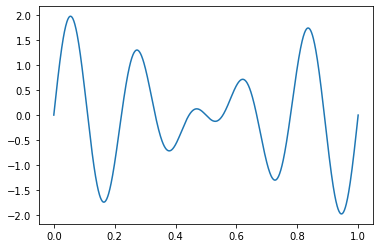

In [118]:
f = fourier_series(0,[0,0,0,0,0],[0,0,0,1,1])
plot_function(f, 0, 1)

In [119]:
f1 = fourier_series(0,[],[4/pi])

In [120]:
f3 = fourier_series(0,[],[4/pi,0,4/(3*pi)])

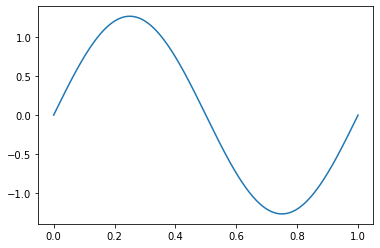

In [121]:
plot_function(f1, 0, 1)

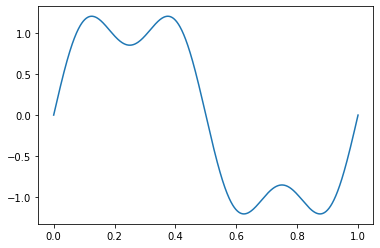

In [122]:
plot_function(f3, 0, 1)

In [123]:
b = [4 / (n * pi) if n % 2 != 0 else 0 for n in range(1, 10)]
f = fourier_series(0, [], b)

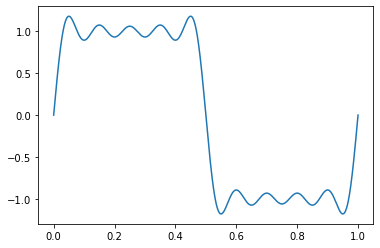

In [124]:
plot_function(f, 0, 1)

In [125]:
b = [4 / (n * pi) if n % 2 != 0 else 0 for n in range(1, 20)]
f = fourier_series(0, [], b)

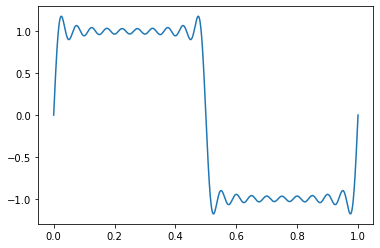

In [128]:
plot_function(f, 0, 1)

In [129]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,100)]
f = fourier_series(0,[],b)

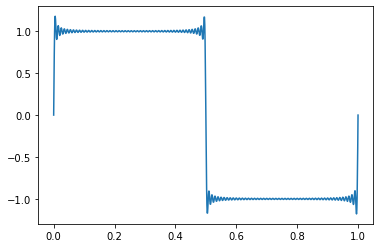

In [131]:
plot_function(f, 0, 1)

In [136]:
def inner_product(f,g,N=1000):
    dt = 1/N 
    return 2*sum([f(t)*g(t)*dt for t in np.arange(0,1,dt)]) #<2>v

In [137]:
def s(n): #<1>
    def f(t):
        return sin(2*pi*n*t)
    return f
def c(n): #<2>
    def f(t):
        return cos(2*pi*n*t)
    return f

In [138]:
inner_product(s(1), s(1))

1.0000000000000002

In [140]:
round(inner_product(s(1), s(2)))

0

In [141]:
from math import sqrt

def const(n):
    return 1 / sqrt(2)



In [142]:
inner_product(const, s(1))

-2.2580204307905138e-17

In [143]:
inner_product(const, const)

1.0000000000000007

In [145]:
round(inner_product(const, s(2)))

0

In [146]:
def fourier_coefficients(f,N):
    a0 = inner_product(f,const) #<1>
    an = [inner_product(f,c(n)) for n in range(1,N+1)] #<2>
    bn = [inner_product(f,s(n)) for n in range(1,N+1)] #<3>
    return a0, an, bn

In [147]:
def square(t):
    return 1 if (t % 1) < 0.5 else -1

In [148]:
a0, a, b = fourier_coefficients(square,10)

In [149]:
def sawtooth(t):
    return t % 1

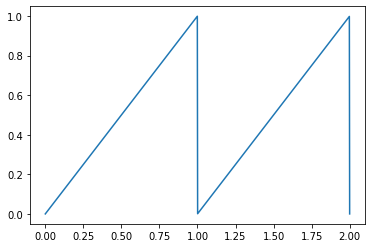

In [150]:
plot_function(sawtooth, 0, 2)

In [151]:
approx = fourier_series(*fourier_coefficients(sawtooth,10))

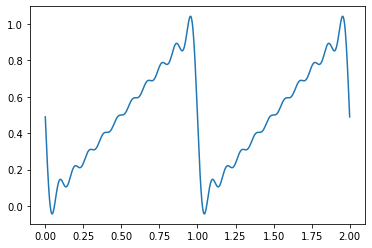

In [152]:
plot_function(approx, 0, 2)

In [153]:
def speedbumps(t):
    if abs(t%1 - 0.5) > 0.25:
        return 0
    else:
        return sqrt(0.25*0.25 - (t%1 - 0.5)**2)

In [154]:
u1 = np.matrix((2, 0, 0)).T
u2 = np.matrix((0, 1, 1)).T
u3 = np.matrix((1, 0, -1)).T

v = np.matrix((3, 4, 5)).T

In [155]:
a1 = u1.T @ v 
a2 = u2.T @ v
a3 = u3.T @ v

matrix([[0]])